In [9]:
import os
import shutil
import numpy as np

# === USER CONFIG ===
src_root = "brain_tumor_dataset"        # your original folder that contains "yes/" and "no/"
dst_root = "dataset_split"  # new folder that will be created with train/val/test
classes_map = {"yes": "Tumor", "no": "NoTumor"}  # map original folder names -> desired class folder names

# ratios: train, val, test (must sum to 1.0)
split_ratios = (0.7, 0.2, 0.1)
seed = 42

# === create target directories ===
for split in ["train", "val", "test"]:
    for cls in classes_map.values():
        os.makedirs(os.path.join(dst_root, split, cls), exist_ok=True)

# === helper to list image files (ignore hidden files) ===
def list_files(directory):
    return [f for f in os.listdir(directory) if not f.startswith('.') and os.path.isfile(os.path.join(directory, f))]

np.random.seed(seed)

for orig_class_folder, target_class_folder in classes_map.items():
    src_class_dir = os.path.join(src_root, orig_class_folder)
    if not os.path.isdir(src_class_dir):
        raise FileNotFoundError(f"Expected folder not found: {src_class_dir}")

    files = list_files(src_class_dir)
    if len(files) == 0:
        print(f"Warning: no files found in {src_class_dir}")
        continue

    np.random.shuffle(files)

    n = len(files)
    n_train = int(split_ratios[0] * n)
    n_val = int(split_ratios[1] * n)
    n_test = n - n_train - n_val  # remainder to test

    train_files = files[:n_train]
    val_files = files[n_train:n_train + n_val]
    test_files = files[n_train + n_val:]

    # copy function
    def copy_list(file_list, split_name):
        for fname in file_list:
            src_path = os.path.join(src_class_dir, fname)
            dst_path = os.path.join(dst_root, split_name, target_class_folder, fname)
            shutil.copy2(src_path, dst_path)

    copy_list(train_files, "train")
    copy_list(val_files, "val")
    copy_list(test_files, "test")

    print(f"{orig_class_folder}: total={n}, train={len(train_files)}, val={len(val_files)}, test={len(test_files)}")

print("Done. New dataset is in:", dst_root)


yes: total=155, train=108, val=31, test=16
no: total=98, train=68, val=19, test=11
Done. New dataset is in: dataset_split


Found 142 images belonging to 2 classes.
Found 34 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Class weights: {0: np.float64(1.290909090909091), 1: np.float64(0.8160919540229885)}
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,273 (56.63 MB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

c:\Users\Samme\Git\DL Project\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6033 - auc: 0.5470 - loss: 0.9920 - precision: 0.6084 - recall: 0.9766 

9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6056 - auc: 0.4468 - loss: 0.9677 - precision: 0.6131 - recall: 0.9655 - val_accuracy: 0.6176 - val_auc: 0.4212 - val_loss: 0.7006 - val_precision: 0.6176 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5843 - auc: 0.6475 - loss: 0.8041 - precision: 0.6016 - recall: 0.9102

9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5775 - auc: 0.5418 - loss: 0.8177 - precision: 0.6080 - recall: 0.8736 - val_accuracy: 0.6176 - val_auc: 0.4799 - val_loss: 0.6657 - val_precision: 0.6176 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5634 - auc: 0.5140 - loss: 0.7584 - precision: 0.6289 - recall: 0.7011 - val_accuracy: 0.6471 - val_auc: 0.4451 - val_loss: 0.6893 - val_precision: 0.6552 - val_recall: 0.9048 - learning_rate: 1.0000e-04
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4916 - auc: 0.4787 - loss: 0.7725 - precision: 0.5733 - recall: 0.4507

9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5352 - auc: 0.5569 - loss: 0.7151 - precision: 0.6567 - recall: 0.5057 - val_accuracy: 0.3824 - val_auc: 0.5769 - val_loss: 0.6969 - val_precision: 0.5000 - val_recall: 0.1905 - learning_rate: 1.0000e-04
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4789 - auc: 0.5446 - loss: 0.7278 - precision: 0.6066 - recall: 0.4253 - val_accuracy: 0.4412 - val_auc: 0.5586 - val_loss: 0.6934 - val_precision: 0.6000 - val_recall: 0.2857 - learning_rate: 1.0000e-04
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4723 - auc: 0.5066 - loss: 0.7402 - precision: 0.6009 - recall: 0.3838

9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5000 - auc: 0.4921 - loss: 0.7411 - precision: 0.6538 - recall: 0.3908 - val_accuracy: 0.6176 - val_auc: 0.6484 - val_loss: 0.6746 - val_precision: 0.7222 - val_recall: 0.6190 - learning_rate: 1.0000e-04
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5182 - auc: 0.5076 - loss: 0.7547 - precision: 0.6169 - recall: 0.4944

9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5352 - auc: 0.5387 - loss: 0.7176 - precision: 0.6479 - recall: 0.5287 - val_accuracy: 0.7647 - val_auc: 0.6813 - val_loss: 0.6617 - val_precision: 0.7407 - val_recall: 0.9524 - learning_rate: 1.0000e-04
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5141 - auc: 0.4891 - loss: 0.7380 - precision: 0.6047 - recall: 0.5977 - val_accuracy: 0.7647 - val_auc: 0.6795 - val_loss: 0.6523 - val_precision: 0.7241 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6474 - auc: 0.6964 - loss: 0.6709 - precision: 0.6829 - recall: 0.7165

9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.6408 - auc: 0.6375 - loss: 0.6732 - precision: 0.7093 - recall: 0.7011 - val_accuracy: 0.7941 - val_auc: 0.7711 - val_loss: 0.6507 - val_precision: 0.7692 - val_recall: 0.9524 - learning_rate: 1.0000e-04
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6479 - auc: 0.6198 - loss: 0.6880 - precision: 0.7370 - recall: 0.6601

9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.6127 - auc: 0.6194 - loss: 0.6868 - precision: 0.7105 - recall: 0.6207 - val_accuracy: 0.7059 - val_auc: 0.7839 - val_loss: 0.6534 - val_precision: 0.7391 - val_recall: 0.8095 - learning_rate: 1.0000e-04
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5539 - auc: 0.5432 - loss: 0.7119 - precision: 0.6408 - recall: 0.5656

9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.5563 - auc: 0.5746 - loss: 0.6902 - precision: 0.6538 - recall: 0.5862 - val_accuracy: 0.7647 - val_auc: 0.8333 - val_loss: 0.6470 - val_precision: 0.7826 - val_recall: 0.8571 - learning_rate: 1.0000e-04
Epoch 12/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5704 - auc: 0.6134 - loss: 0.6880 - precision: 0.6757 - recall: 0.5747 - val_accuracy: 0.7647 - val_auc: 0.7564 - val_loss: 0.6495 - val_precision: 0.7826 - val_recall: 0.8571 - learning_rate: 1.0000e-04
Epoch 13/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5423 - auc: 0.5795 - loss: 0.6907 - precision: 0.6410 - recall: 0.5747 - val_accuracy: 0.7059 - val_auc: 0.8260 - val_loss: 0.6393 - val_precision: 0.7200 - val_recall: 0.8571 - learning_rate: 1.0000e-04
Epoch 14/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5493 - auc: 0.5791 - loss: 0.6916 - precision: 0.6420 - recall: 0.5977 - val_accuracy: 0.6765 - val_auc: 0.8132 - val_loss: 0.6323 - val_precision: 

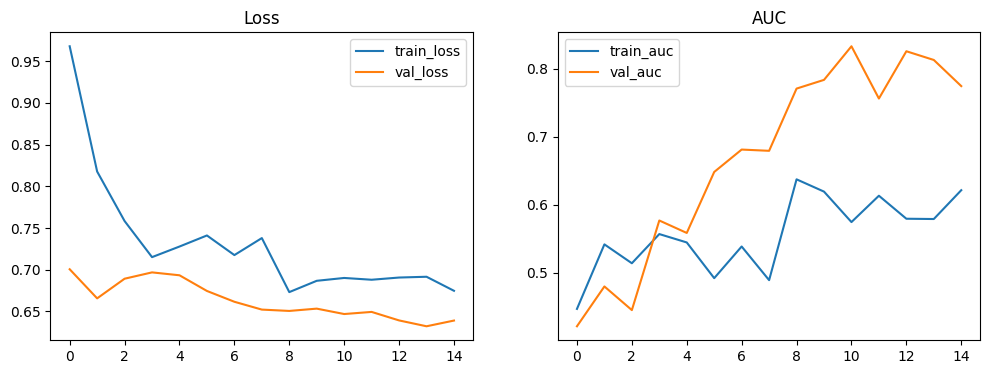

In [11]:
# === imports ===
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import itertools
from tensorflow.keras.preprocessing import image

# === config/hyperparams ===
BASE_DIR = "dataset_split"            # change if needed
TRAIN_DIR = os.path.join(BASE_DIR, "train")
TEST_DIR  = os.path.join(BASE_DIR, "test")   # optional
IMG_SIZE = (224, 224)
BATCH = 16
SEED = 42
EPOCHS = 15
LEARNING_RATE = 1e-4

# === Data generators (with augmentation) ===
train_datagen = ImageDataGenerator(
    rescale=1./255,                  # or use preprocess_input later
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Use subset to split into train/val
train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='binary',   # binary labels
    color_mode='rgb',       # this will convert grayscale to RGB
    subset='training',
    seed=SEED
)

val_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='binary',
    color_mode='rgb',
    subset='validation',
    seed=SEED
)

# Optionally a test generator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = None
if os.path.isdir(TEST_DIR):
    test_gen = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=IMG_SIZE,
        batch_size=BATCH,
        class_mode='binary',
        color_mode='rgb',
        shuffle=False
    )

# === Handle class imbalance ===
labels = train_gen.classes  # numpy array of labels in training subset
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weights = {i: w for i, w in enumerate(class_weights)}
print("Class weights:", class_weights)

# === Build model - VGG16 as feature extractor ===
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False  # freeze for feature-extraction

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)  # binary classification

model = Model(inputs=base_model.input, outputs=outputs)
model.summary()

# === compile ===
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

# === callbacks ===
checkpoint = ModelCheckpoint("vgg16_brain_tumor_best.h5", save_best_only=True, monitor='val_auc', mode='max')
early = EarlyStopping(monitor='val_auc', patience=6, mode='max', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=3, mode='max')

# === train ===
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    class_weight=class_weights,
    callbacks=[checkpoint, early, reduce_lr]
)

# === Evaluate on test set if available ===
if test_gen:
    print("Evaluating on test set...")
    test_steps = test_gen.samples // BATCH + 1
    results = model.evaluate(test_gen, steps=test_steps)
    print("Test results:", results)

    # Predictions & classification report
    preds = model.predict(test_gen, steps=test_steps)
    y_pred = (preds.ravel() >= 0.5).astype(int)
    y_true = test_gen.classes[:len(y_pred)]
    print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))
    print("AUC:", roc_auc_score(y_true, preds[:len(y_true)]))

# === Plot training curves ===
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['auc'], label='train_auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.legend()
plt.title('AUC')
plt.show()


In [13]:
# %matplotlib inline
# plt.figure(figsize=(10,10))
# for i in range(4):
#     plt.subplot(1,4,i+1)
#     plt.imshow(X[i],cmap='gray')
#     plt.axis('off')
# plt.show()